# Librerias

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

from category_encoders import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-attrition-for-healthcare/watson_healthcare_modified.csv


# Data

In [2]:
data = pd.read_csv('../input/employee-attrition-for-healthcare/watson_healthcare_modified.csv')
data

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [4]:
data = data.drop(['EmployeeID'], axis = 1)

In [5]:
data['Attrition'].value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Attrition', ylabel='count'>

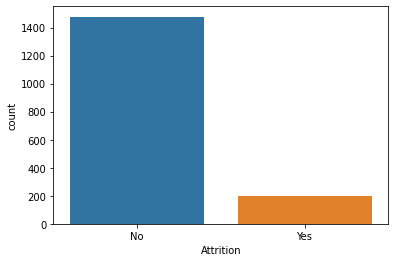

In [6]:
sns.countplot(data['Attrition'], label = 'Count')

# Categoricals

In [7]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 9 categorical variables

The categorical variables are : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [8]:
for var in categorical: 
    
    print(data[var].value_counts())

No     1477
Yes     199
Name: Attrition, dtype: int64
Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: BusinessTravel, dtype: int64
Maternity     796
Cardiology    531
Neurology     349
Name: Department, dtype: int64
Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: EducationField, dtype: int64
Male      998
Female    678
Name: Gender, dtype: int64
Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: JobRole, dtype: int64
Married     777
Single      522
Divorced    377
Name: MaritalStatus, dtype: int64
Y    1676
Name: Over18, dtype: int64
No     1200
Yes     476
Name: OverTime, dtype: int64


# Numerical

In [9]:
numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 25 numerical variables

The numerical variables are : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [10]:
data[numerical].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,3,61,2,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,92,2,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,4,56,3,1,3,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,1,40,3,1,2,...,4,80,1,6,3,3,2,2,2,2


In [11]:
print(round(data[numerical].describe()),2)

          Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
count  1676.0     1676.0            1676.0     1676.0         1676.0   
mean     37.0      801.0               9.0        3.0            1.0   
std       9.0      402.0               8.0        1.0            0.0   
min      18.0      102.0               1.0        1.0            1.0   
25%      30.0      465.0               2.0        2.0            1.0   
50%      36.0      796.0               7.0        3.0            1.0   
75%      43.0     1157.0              14.0        4.0            1.0   
max      60.0     1499.0              29.0        5.0            1.0   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
count                   1676.0      1676.0          1676.0    1676.0   
mean                       3.0        65.0             3.0       2.0   
std                        1.0        20.0             1.0       1.0   
min                        1.0        30.0             1.0     

## Drop std = 0

In [12]:
threshold = 0.2

In [13]:
data = data.drop(data.std()[data.std() < threshold].index.values, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [14]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,3,Male,...,3,2,0,1,3,1,1,0,0,0
1672,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,3,Female,...,3,3,1,15,3,3,3,2,1,2
1673,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,4,Female,...,3,4,0,1,0,4,1,0,0,0
1674,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,4,Female,...,3,3,1,21,3,3,21,6,11,8


## Outliers?

Text(0, 0.5, 'HourlyRate')

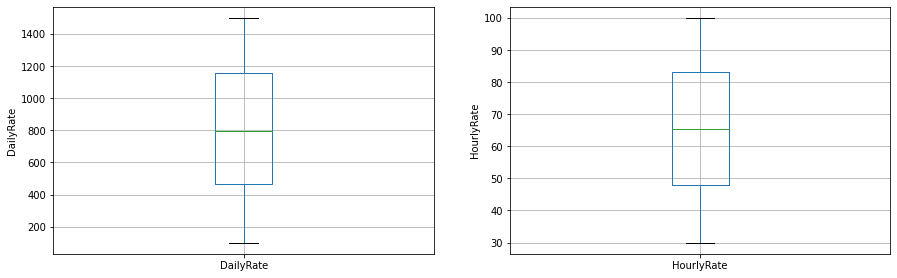

In [15]:

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='DailyRate')
fig.set_title('')
fig.set_ylabel('DailyRate')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='HourlyRate')
fig.set_title('')
fig.set_ylabel('HourlyRate')




# Get dummies

In [16]:
data0 = data.copy()

In [17]:
data0 = pd.get_dummies(data0, drop_first = True)

In [18]:
data0

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,1,0,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,1,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,1,0,1,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,0,1,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,471,24,3,3,66,1,1,4,2340,...,0,1,1,0,1,0,0,0,1,1
1672,46,1125,10,3,3,94,2,3,4,9071,...,0,0,0,0,1,0,0,1,0,1
1673,20,959,1,3,4,83,2,1,2,2836,...,0,0,0,0,0,1,0,0,1,0
1674,39,466,1,1,4,65,2,4,4,12742,...,0,0,0,0,0,0,1,1,0,0


In [19]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Age                               1676 non-null   int64
 1   DailyRate                         1676 non-null   int64
 2   DistanceFromHome                  1676 non-null   int64
 3   Education                         1676 non-null   int64
 4   EnvironmentSatisfaction           1676 non-null   int64
 5   HourlyRate                        1676 non-null   int64
 6   JobInvolvement                    1676 non-null   int64
 7   JobLevel                          1676 non-null   int64
 8   JobSatisfaction                   1676 non-null   int64
 9   MonthlyIncome                     1676 non-null   int64
 10  MonthlyRate                       1676 non-null   int64
 11  NumCompaniesWorked                1676 non-null   int64
 12  PercentSalaryHike                 

In [20]:
data0.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,36.866348,800.557876,9.221957,2.907518,2.714797,65.470167,2.724940,2.066826,2.738663,6516.512530,...,0.052506,0.088902,0.595465,0.068616,0.490453,0.318616,0.112768,0.463604,0.311456,0.284010
std,9.129126,401.594438,8.158118,1.025835,1.097534,20.207572,0.714121,1.113423,1.104005,4728.456618,...,0.223112,0.284687,0.490948,0.252875,0.500058,0.466079,0.316404,0.498822,0.463227,0.451076
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2928.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,796.500000,7.000000,3.000000,3.000000,65.500000,3.000000,2.000000,3.000000,4899.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8380.250000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
data0.corrwith(data0['Attrition_Yes']).sort_values().max

<bound method NDFrame._add_numeric_operations.<locals>.max of Age                                -0.239984
TotalWorkingYears                  -0.234182
YearsInCurrentRole                 -0.207891
JobLevel                           -0.207634
YearsAtCompany                     -0.201373
YearsWithCurrManager               -0.201087
MonthlyIncome                      -0.193527
JobInvolvement                     -0.166036
Shift                              -0.158322
MaritalStatus_Married              -0.115616
JobRole_Therapist                  -0.107536
EnvironmentSatisfaction            -0.101278
JobRole_Administrative             -0.092332
WorkLifeBalance                    -0.090513
YearsSinceLastPromotion            -0.086207
JobSatisfaction                    -0.081881
Department_Neurology               -0.065589
BusinessTravel_Travel_Rarely       -0.059064
TrainingTimesLastYear              -0.054836
DailyRate                          -0.053892
EducationField_Medical             -0.

# Dividir test and train

In [22]:
data1 = data0.copy()

In [23]:
y = data1['Attrition_Yes']
X = data1.drop(['Attrition_Yes'],axis = 1)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Escalar datos

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelos

In [26]:
def models(X_train,Y_train):
  
  #Using Logistic Regression 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC linear
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [27]:
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.9432835820895522
[1]K Nearest Neighbor Training Accuracy: 0.9216417910447762
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9455223880597015
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9664179104477612
[4]Gaussian Naive Bayes Training Accuracy: 0.4261194029850746
[5]Decision Tree Classifier Training Accuracy: 0.9970149253731343
[6]Random Forest Classifier Training Accuracy: 0.991044776119403


In [28]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[281   8]
 [ 15  32]]
Model[0] Testing Accuracy = "0.9315476190476191!"

[[285   4]
 [ 37  10]]
Model[1] Testing Accuracy = "0.8779761904761905!"

[[282   7]
 [ 18  29]]
Model[2] Testing Accuracy = "0.9255952380952381!"

[[286   3]
 [ 28  19]]
Model[3] Testing Accuracy = "0.9077380952380952!"

[[116 173]
 [  8  39]]
Model[4] Testing Accuracy = "0.46130952380952384!"

[[274  15]
 [ 23  24]]
Model[5] Testing Accuracy = "0.8869047619047619!"

[[284   5]
 [ 30  17]]
Model[6] Testing Accuracy = "0.8958333333333334!"



In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       289
           1       0.80      0.68      0.74        47

    accuracy                           0.93       336
   macro avg       0.87      0.83      0.85       336
weighted avg       0.93      0.93      0.93       336

0.9315476190476191

Model  1
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       289
           1       0.71      0.21      0.33        47

    accuracy                           0.88       336
   macro avg       0.80      0.60      0.63       336
weighted avg       0.86      0.88      0.85       336

0.8779761904761905

Model  2
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       289
           1       0.81      0.62      0.70        47

    accuracy                           0.93       336
   macro avg       0.87      0.80      0.83       336
weighte

# Logistic

## Matrix

In [30]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [31]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[281   8]
 [ 15  32]]

True Positives(TP) =  281

True Negatives(TN) =  32

False Positives(FP) =  8

False Negatives(FN) =  15


In [33]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9315


In [34]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [35]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9433


## Overfitting?

In [36]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9433
Test set score: 0.9315


## C value

In [37]:
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [38]:
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.9455
Test set score: 0.9375


In [39]:
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [40]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.9306
Test set score: 0.9167


## precision del modelo

In [41]:
y_test.value_counts()

0    289
1     47
Name: Attrition_Yes, dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[281   8]
 [ 15  32]]

True Positives(TP) =  281

True Negatives(TN) =  32

False Positives(FP) =  8

False Negatives(FN) =  15


<AxesSubplot:>

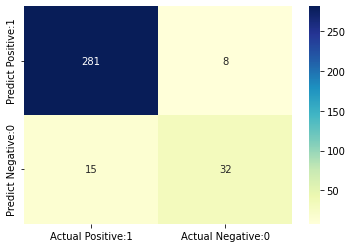

In [43]:

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       289
           1       0.80      0.68      0.74        47

    accuracy                           0.93       336
   macro avg       0.87      0.83      0.85       336
weighted avg       0.93      0.93      0.93       336



In [45]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [46]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9315


In [47]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0685


In [48]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9723


In [49]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9493


##  Ajuste

In [50]:
y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.27002388e-01, 7.29976123e-02],
       [9.82442489e-01, 1.75575111e-02],
       [9.28272866e-01, 7.17271338e-02],
       [9.99807256e-01, 1.92743762e-04],
       [4.71450597e-01, 5.28549403e-01],
       [8.60341523e-01, 1.39658477e-01],
       [8.83864689e-01, 1.16135311e-01],
       [9.81807782e-01, 1.81922178e-02],
       [9.83526470e-01, 1.64735297e-02],
       [9.92555819e-01, 7.44418076e-03]])

In [51]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No (0)', 'Prob of - yes(1)'])

y_pred_prob_df

,Prob of - No (0),Prob of - yes(1)
0,0.927002,0.072998
1,0.982442,0.017558
2,0.928273,0.071727
3,0.999807,0.000193
4,0.471451,0.528549
5,0.860342,0.139658
6,0.883865,0.116135
7,0.981808,0.018192
8,0.983526,0.016474
9,0.992556,0.007444


In [52]:
logreg.predict_proba(X_test)[0:10, 1]

array([7.29976123e-02, 1.75575111e-02, 7.17271338e-02, 1.92743762e-04,
       5.28549403e-01, 1.39658477e-01, 1.16135311e-01, 1.81922178e-02,
       1.64735297e-02, 7.44418076e-03])

In [53]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

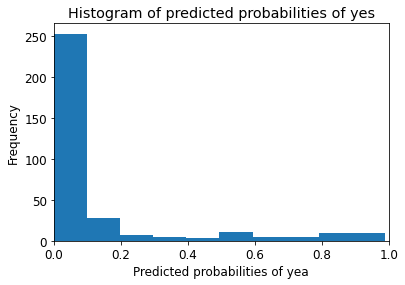

In [54]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of yes')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of yea')
plt.ylabel('Frequency')

## Lower the threshold

In [55]:

from sklearn import metrics

(0.0, 1.0)

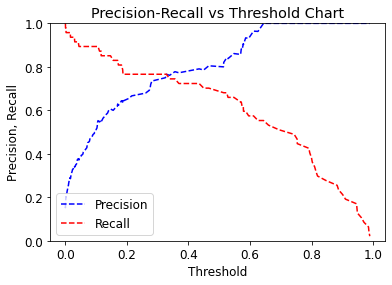

In [56]:
### Predict test_y values and probabilities based on fitted logistic 


pred_y=logreg.predict(X_test) 

probs_y=logreg.predict_proba(X_test) 
  

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

## K- validation

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.93656716 0.94029851 0.9141791  0.91791045 0.95149254]


In [58]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9321


## optimizar parametros

In [59]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':np.logspace(-3,3,7)},
               {'solver' : ['newton-cg', 'lbfgs', 'liblinear']} ]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
                         {'solver': ['newton-cg', 'lbfgs', 'liblinear']}],
             scoring='accuracy')

In [60]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9351


Parameters that give the best results : 

 {'C': 0.1}


Estimator that was chosen by the search : 

 LogisticRegression(C=0.1, random_state=0, solver='liblinear')


In [61]:
logreg1 = LogisticRegression(C = 0.1, 
                            penalty = 'l2', 
                            solver = 'liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",logreg.score(X_test, y_test))

Accuracy: 0.9315476190476191
